## During the whole project, I referenced the manual of numpy, pandas and matplotlib.


# Project: Investigate TMDB movie data

## Table of Contents
<ul>
<li><a href="#intro">1.Introduction</a></li>
<li><a href="#wrangling">2.Data Wrangling</a></li>
<li><a href="#eda">3.Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4.Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

This data set contains information about more than 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

I want use columns such as ratings, revenue, runtime, genres ect  to investgate the following questions:

1. What kind of properties are associated with revenue?

2. What kind of properties are associated with vote?

3. How genres prefenrnce changed form year to year?

In [2]:
# Set up import statements for all of the packages that I plan to use.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline    

<a id='wrangling'></a>
## 2. Data Wrangling

In this section, I will load the csv file, look into the data set, clean the data base on the 3 questions I am going to answer , and finall get a clean data set to be analyzed.

### 2.1. General Properties

I will load the date set using pandas, and inspect the data roughly.

In [4]:
# Load the data set and print out a few lines

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# See how many columns and rows the data set has
df.shape

(10866, 21)

In [6]:
# see the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# See how many null values the data set has
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# See if there is any duplicated rows
df.duplicated().sum()

1

In [9]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [10]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

######  It shows that there are sevel problems to fix:
1. Some cloumns are not related to my search, I will drop them.
2. There are sevel columns has missing datas, I have to deal with them.
3. I have to drop the only duplicated row.
4. The columns such as 'genres' contains multiple values separated by pipe (|) characters，I need to convert the datatype to 'list' for future lierating .

### 2.2. Drop extraneous columns
Drop features that are usless for the questions.

In [11]:
# Check the columns again
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Sevel columns need to be droped such as:

**'imdb_id':** already have 'id'

**'homepage', 'keywords', 'tagline','overview'** are all descriptive content, are usless for the research

**'production_companies' :** It has too many nulls, I also want to drop it

In [12]:
# drop 'imdb_id','homepage','budget', 'revenue','keywords','tagline','overview','production_companies'
df.drop(columns = ['imdb_id','homepage','keywords','tagline','overview','production_companies'],inplace = True)
# check if sucessfully droped the columns
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

### 2.3. Drop Rows with Missing Values
Deal with rows contain missing values.

In [13]:
# after droping the columns check the null situation again
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [14]:
# drop rows with any null values 
df.dropna(axis = 0, how = 'any', inplace = True)
# check if any rows still have null values
df.isnull().sum().any()

False

### 2.4. Drop Duplicate rows
Drop any duplicate rows.

In [15]:
# Check duplicates again
df.duplicated().sum()

1

In [16]:
# drop duplicates
df.drop_duplicates(inplace = True)
# check if drop sucessfully
df.duplicated().sum()

0

### 2.5. Inspecting Data Types
Inspect the datatype of each column again, when necessary, change the datatype to a suitable datatype.

In [17]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [19]:
# I want to change the datatype of budget and revenue to float
df['budget'] = df['budget'].astype(float)
df['revenue'] = df['revenue'].astype(float)

In [20]:
# I need to convert the datatype of 'cast' and 'genres' columns to list for future lierating .
for i in ['genres','cast']:
    df[i] = df[i].apply(lambda x : x.strip().split('|'))


In [21]:
# Check if change type successfully
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


###### I've trimmed and cleaned the data set, and are ready to move on to exploration.

<a id='eda'></a>
## 3. Exploratory Data Analysis

### 3.1. Research Question 1 : What kind of properties are associated with revenue

I'd like to investgate the relationship between 'revenue_adj' and sevel columns such as 'budget_adj', 'vote_average', 'release_year', 'director'

In [22]:
# First look the statistics indicators of 'revenue_adj'
df['revenue_adj'].describe()


count    1.073100e+04
mean     5.200623e+07
std      1.454252e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.470546e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

###### It shows that, at least 50% of the revenue_adj value is 0, I want to get a sub set with revenue_adj not equal to zero.

In [23]:
df_rev_not0 = df.query('revenue_adj != 0')

In [24]:
#Check the statistics indicators of 'revenue_adj' again
df_rev_not0['revenue_adj'].describe()

count    4.843000e+03
mean     1.152341e+08
std      1.989424e+08
min      2.370705e+00
25%      1.048057e+07
50%      4.402879e+07
75%      1.317599e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

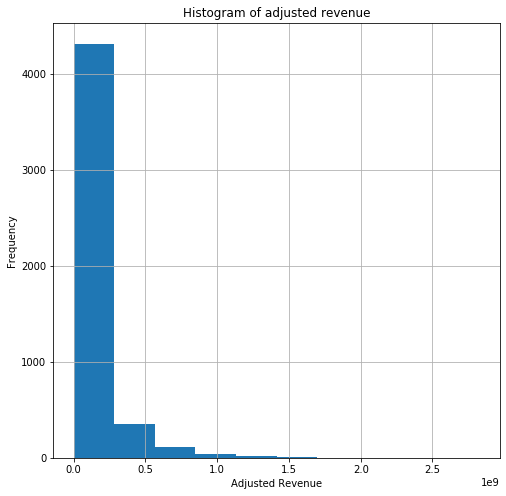

In [26]:
chart = df_rev_not0['revenue_adj'].plot(kind = 'hist',grid = True,
        title = 'Histogram of adjusted revenue',figsize = (8,8) )
chart.set_xlabel('Adjusted Revenue')
chart.set_ylabel('Frequency')
plt.show()

###### It show that the vast majority of the film's revenue are less than 25 million dollors

Now I will look into the relations between sevel columns.

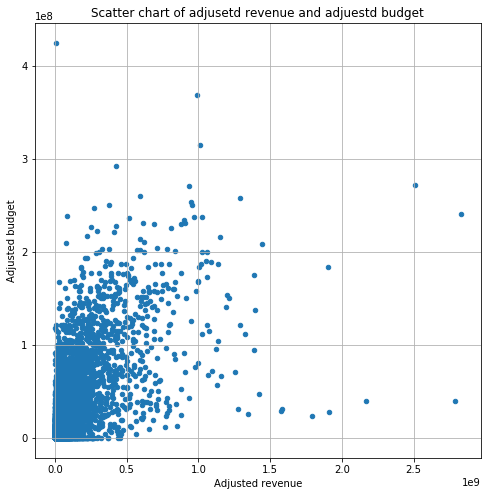

In [31]:

# I will use scatter chart many times, I will build a function for easy useing.

def setscatter(datafram,x_axis,y_axis,chart_title,x_label,y_label):
    chart = datafram.plot(x = x_axis , y = y_axis , kind = 'scatter' , grid = True,
             title = chart_title, figsize = (8,8))
    chart.set_xlabel(x_label)
    chart.set_ylabel(y_label)

# get a scatter chart using 'revenue_adj' as X axis, and 'budget_adj' as Y axis.
setscatter(df_rev_not0,'revenue_adj','budget_adj','Scatter chart of adjusetd revenue and adjuestd budget','Adjusted revenue','Adjusted budget') 


It only shows that 'revenue_adj' and 'budget_adj' have positive corrlation relationship.

Next step, I want to see the relationship between revenue and vote.

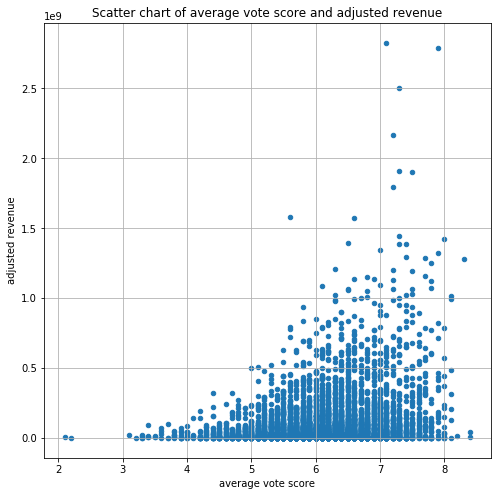

In [32]:
# get a scatter chat using 'vote_average' as X axis, and 'revenue_adj' as Y axis.
setscatter(df_rev_not0,'vote_average','revenue_adj',
           'Scatter chart of average vote score and adjusted revenue',
           'average vote score','adjusted revenue')


It shows that revenue and vote have positive corrlation. 
From the scatter chart, I can tell there is nearly no film with high revenue and low vote at the same time.

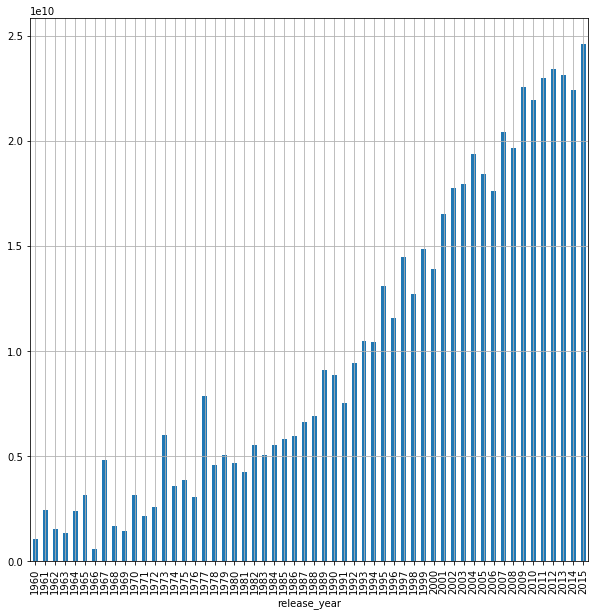

In [33]:
# get a bar chat using 'release_year' as X axis, and the sum of 'revenue_adj' as Y axis.
df_rev_not0.groupby('release_year')['revenue_adj'].sum().plot(kind = 'bar',grid = True, figsize = (10,10))


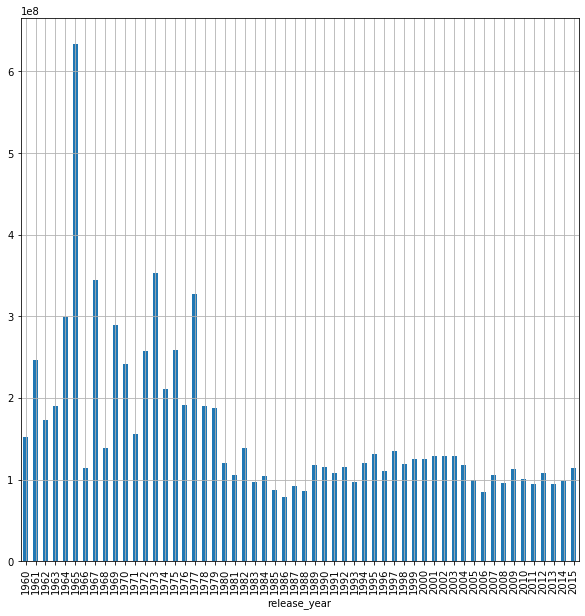

In [34]:
# get a bar chat using 'release_year' as X axis, and the average of 'revenue_adj' as Y axis.
df_rev_not0.groupby('release_year')['revenue_adj'].mean().plot(kind = 'bar',grid = True, figsize = (10,10))

From the above two charts, I found that, total revenue keep growing in a approximately linear manner. But average revenue didn't change too much, especially in the recent 35 years.

### 3.2. Research Question 2 : What kind of properties are associated with average vote

I'd like to investgate the relationship between 'vote_average' and some columns such as what's the relationship between vote and some proprtties

In [35]:
# First look the statistics indicators of 'average_vote'
df['vote_average'].describe()

count    10731.000000
mean         5.964710
std          0.930283
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

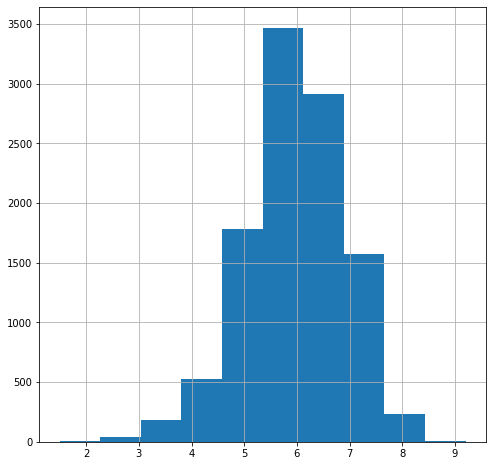

In [36]:
df['vote_average'].hist(figsize = (8,8))

I can say the 'vote_average' histgram chart shows a bit left skewed.

Next, I will have a look at relations withn sevel other columns.

As I have researched the relationship between revenue and vote already, I will look into 'bugdet_adj' first.

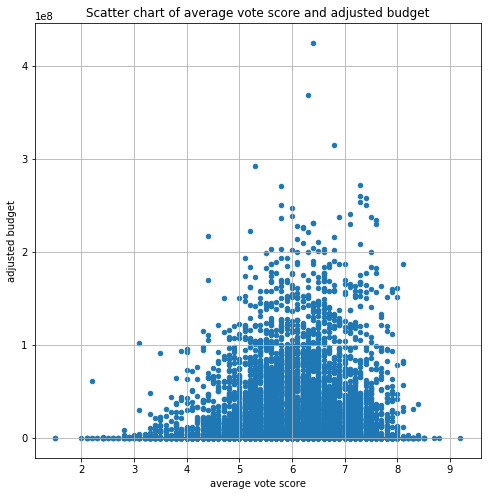

In [37]:
# get a scatter chat using 'vote_average' as X axis, and 'budget_adj' as Y axis.
setscatter(df,'vote_average','budget_adj',
           'Scatter chart of average vote score and adjusted budget',
           'average vote score','adjusted budget')


It shows that budget and vote have positive corrlation. 
From the scatter chart, I can tell there is nearly no film with high budget and low vote at the same time.

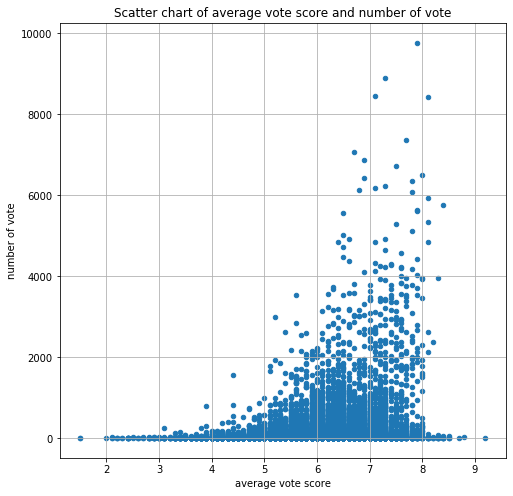

In [38]:
# get a scatter chat using 'vote_average' as X axis, and 'vote_count' as Y axis.
setscatter(df,'vote_average','vote_count',
           'Scatter chart of average vote score and number of vote',
           'average vote score','number of vote')



It show vote count and vote average score have positive corrlation, and there is no vote has high count and low score at the same time.

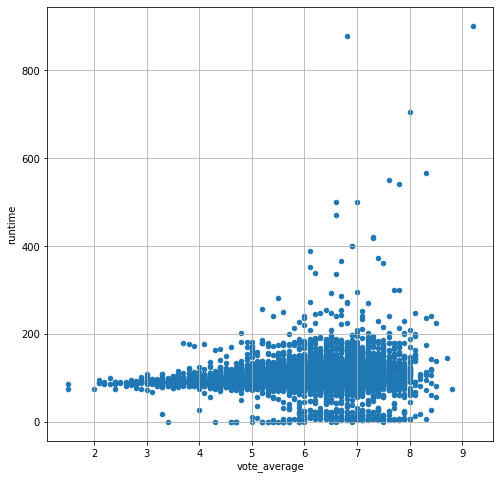

In [39]:
# get a scatter chat using 'vote_average' as X axis, and 'runtime' as Y axis.
df.plot(x = 'vote_average',y = 'runtime',kind = 'scatter',grid = True, figsize = (8,8))

I find that, the scatters have gathered into two parts, one part with a mean value around 100, the second part with a mean value a bit high than 50 .
I will separate the date set into two data sets to have a look.

In [40]:
# get a sub set with runtime less than 50
df_short = df.query('runtime <50')
df_short.mean()

id              116172.117155
popularity           0.380446
budget          353274.778243
revenue         440082.648536
runtime             16.447699
vote_count          51.267782
vote_average         6.605021
release_year      2006.259414
budget_adj      406245.037746
revenue_adj     651609.326337
dtype: float64

In [41]:
# get a sub set with runtime large or equal to 50
df_long = df.query('runtime >=50')
df_long.mean()

id              6.404067e+04
popularity      6.588145e-01
budget          1.513281e+07
revenue         4.122832e+07
runtime         1.044283e+02
vote_count      2.236523e+02
vote_average    5.950124e+00
release_year    2.001146e+03
budget_adj      1.816073e+07
revenue_adj     5.317605e+07
dtype: float64

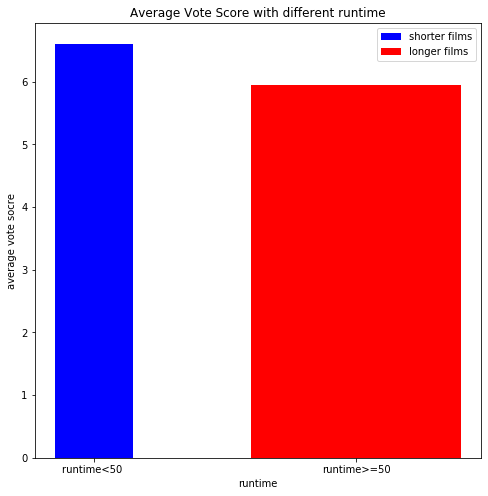

In [52]:
# get a bar chart use the mean value vote_count form both data set.

plt.figure(figsize = (8,8),edgecolor = 'g')
less_bar = plt.bar('runtime<50 ',df_short['vote_average'].mean(),
                       width = 0.3, color = 'b',label = 'shorter films')
more_bar = plt.bar('runtime>=50',df_long['vote_average'].mean(),
                       width = 0.8, color = 'r',label = 'longer films')

plt.xlabel('runtime')
plt.ylabel('average vote socre')
plt.title ('Average Vote Score with different runtime')

plt.legend()
plt.show()

I found that, films with runtime less than 60 minutes obviously has higher vote score than films with runtime higher than 60 minutes

### 3.3. Research Question 3 : What genres are most popular from year to year

Besides these numerical relationships, I'd like to research with some text data. 
I want to find out what's the most popular genres every year.

I want to build a dictionary, keys are release_year,value is a dictionary, within the inner dictionary, keys are the genres, values are how many times the genres showe within the year. 

Then, I will use the dicitonray to set a datafram.

In [78]:
# First, I will get a list of release_year and sorted form small to large.
yearlist = list(df['release_year'].value_counts().sort_index().index)
yearlist

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [79]:
# get a list of all genres
genre_list = []
for i in list(df['genres']):
    for j in i:
        if j not in genre_list:
            genre_list.append(j)
genre_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

In [80]:
# get a dictionary "yeardic_all", key is year,value is a dictionary.
# in the value dictionary, key is the genre, value is how many times the genres showe within the year. 
yeardic_all = {}
for year in yearlist: 
    d = {}
    df_year = df.query('release_year == @year')
    for i in range(0, df_year.shape[0]):
        for j in df_year.iloc[i]['genres']:
            if j in d.keys():
                d[j] += 1
            else:
                d[j] = 1
    yeardic_all[year] = d

yeardic_all


{1960: {'Drama': 13,
  'Horror': 7,
  'Thriller': 6,
  'Action': 8,
  'Adventure': 5,
  'Western': 6,
  'History': 5,
  'Comedy': 8,
  'Romance': 6,
  'Fantasy': 2,
  'Science Fiction': 3,
  'Family': 3,
  'Music': 1,
  'Crime': 2,
  'Foreign': 1,
  'War': 2},
 1961: {'Adventure': 6,
  'Animation': 1,
  'Comedy': 10,
  'Family': 5,
  'Drama': 16,
  'Romance': 7,
  'Music': 2,
  'Crime': 2,
  'Action': 7,
  'War': 2,
  'Mystery': 1,
  'History': 3,
  'Western': 3,
  'Horror': 3,
  'Science Fiction': 4,
  'Fantasy': 2,
  'Foreign': 1},
 1962: {'Adventure': 7,
  'Action': 8,
  'Thriller': 7,
  'Drama': 21,
  'History': 4,
  'War': 3,
  'Romance': 5,
  'Crime': 3,
  'Mystery': 4,
  'Comedy': 5,
  'Western': 3,
  'Music': 1,
  'Family': 2,
  'Horror': 5,
  'Fantasy': 1,
  'Foreign': 1,
  'Science Fiction': 2},
 1963: {'Action': 4,
  'Thriller': 10,
  'Adventure': 7,
  'Animation': 1,
  'Family': 3,
  'Horror': 9,
  'Comedy': 13,
  'Mystery': 6,
  'Romance': 8,
  'Drama': 13,
  'History': 4,

In [81]:
# set another datafram with this yeardic_all dictionray
df_genres = pd.DataFrame.from_dict(yeardic_all)
df_genres.head()


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Drama,13.0,16.0,21.0,13.0,20.0,20.0,16.0,16.0,19.0,13.0,...,196,197,232,222.0,208,213,231,253.0,284.0,260.0
Horror,7.0,3.0,5.0,9.0,6.0,5.0,3.0,4.0,4.0,1.0,...,56,78,76,90.0,78,78,104,102.0,105.0,125.0
Thriller,6.0,NaN,7.0,10.0,9.0,11.0,8.0,5.0,5.0,3.0,...,114,123,127,157.0,133,146,160,175.0,178.0,171.0
Action,8.0,7.0,8.0,4.0,5.0,9.0,14.0,7.0,6.0,10.0,...,79,94,98,108.0,106,115,99,119.0,129.0,106.0
Adventure,5.0,6.0,7.0,7.0,5.0,6.0,11.0,7.0,5.0,5.0,...,55,60,63,71.0,58,61,50,65.0,67.0,69.0


In [156]:
# find the max column name in each row
df_genres.idxmax()

1960     Drama
1961     Drama
1962     Drama
1963     Drama
1964     Drama
1965     Drama
1966     Drama
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984     Drama
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001    Comedy
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
dtype: object

###### From the above research, I got the answer of question 3, in most years, drama is the most popular genre, except for 1967,1985,1987,1988,1989,1994,2001,2003. In there years, comedy is the most popular genre.

I also want to find some details of the new data set.

I change the columns with rows, and set NaN value to 0

In [82]:
# transpose the data set
df_genres = df_genres.T
df_genres

,Drama,Horror,Thriller,Action,Adventure,Western,History,Comedy,Romance,Fantasy,Science Fiction,Family,Music,Crime,Foreign,War,Animation,Mystery,TV Movie,Documentary
1960,13.0,7.0,6.0,8.0,5.0,6.0,5.0,8.0,6.0,2.0,3.0,3.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN
1961,16.0,3.0,NaN,7.0,6.0,3.0,3.0,10.0,7.0,2.0,4.0,5.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,NaN
1962,21.0,5.0,7.0,8.0,7.0,3.0,4.0,5.0,5.0,1.0,2.0,2.0,1.0,3.0,1.0,3.0,NaN,4.0,NaN,NaN
1963,13.0,9.0,10.0,4.0,7.0,2.0,4.0,13.0,8.0,2.0,2.0,3.0,NaN,4.0,2.0,1.0,1.0,6.0,NaN,NaN
1964,20.0,6.0,9.0,5.0,5.0,1.0,3.0,16.0,9.0,4.0,4.0,4.0,5.0,10.0,1.0,3.0,2.0,4.0,NaN,NaN
1965,20.0,5.0,11.0,9.0,6.0,4.0,4.0,7.0,5.0,NaN,2.0,3.0,2.0,2.0,1.0,8.0,1.0,3.0,1.0,NaN
1966,16.0,3.0,8.0,14.0,11.0,7.0,2.0,16.0,6.0,2.0,6.0,7.0,NaN,5.0,2.0,4.0,3.0,6.0,NaN,1.0
1967,16.0,4.0,5.0,7.0,7.0,2.0,NaN,17.0,11.0,3.0,4.0,3.0,4.0,7.0,NaN,1.0,1.0,3.0,NaN,1.0
1968,19.0,4.0,5.0,6.0,5.0,1.0,3.0,9.0,6.0,5.0,4.0,5.0,3.0,5.0,NaN,4.0,3.0,4.0,NaN,NaN
1969,13.0,1.0,3.0,10.0,5.0,7.0,3.0,11.0,4.0,2.0,3.0,4.0,2.0,3.0,NaN,3.0,2.0,1.0,1.0,NaN


In [83]:
# fill the null value with 0, and check if successfully filled
df_genres.fillna(0,inplace = True)
df_genres.isnull().sum()

Drama              0
Horror             0
Thriller           0
Action             0
Adventure          0
Western            0
History            0
Comedy             0
Romance            0
Fantasy            0
Science Fiction    0
Family             0
Music              0
Crime              0
Foreign            0
War                0
Animation          0
Mystery            0
TV Movie           0
Documentary        0
dtype: int64

In [84]:
#check the datatype
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1960 to 2015
Data columns (total 20 columns):
Drama              56 non-null float64
Horror             56 non-null float64
Thriller           56 non-null float64
Action             56 non-null float64
Adventure          56 non-null float64
Western            56 non-null float64
History            56 non-null float64
Comedy             56 non-null float64
Romance            56 non-null float64
Fantasy            56 non-null float64
Science Fiction    56 non-null float64
Family             56 non-null float64
Music              56 non-null float64
Crime              56 non-null float64
Foreign            56 non-null float64
War                56 non-null float64
Animation          56 non-null float64
Mystery            56 non-null float64
TV Movie           56 non-null float64
Documentary        56 non-null float64
dtypes: float64(20)
memory usage: 11.7 KB


For further analyzing, I want to convert the numbers into pencentage.

In [85]:
# get how many films in each year.
df_genres['total'] = df.groupby('release_year').count()['genres']

In [86]:
# convert every number into pencentage
df_genres.head()
for column in df_genres.columns:
    df_genres[column] = df_genres[column]/df_genres['total']
df_genres.tail(20)

,Drama,Horror,Thriller,Action,Adventure,Western,History,Comedy,Romance,Fantasy,...,Family,Music,Crime,Foreign,War,Animation,Mystery,TV Movie,Documentary,total
1996,0.512315,0.083744,0.300493,0.206897,0.147783,0.000000,0.024631,0.448276,0.216749,0.108374,...,0.152709,0.019704,0.093596,0.009852,0.014778,0.039409,0.064039,0.009852,0.014778,1.0
1997,0.434555,0.094241,0.319372,0.308901,0.183246,0.000000,0.036649,0.397906,0.167539,0.109948,...,0.167539,0.020942,0.146597,0.015707,0.005236,0.047120,0.109948,0.005236,0.010471,1.0
1998,0.514286,0.109524,0.252381,0.204762,0.180952,0.004762,0.033333,0.400000,0.195238,0.104762,...,0.161905,0.057143,0.161905,0.019048,0.014286,0.076190,0.085714,0.014286,0.014286,1.0
1999,0.504464,0.116071,0.236607,0.169643,0.089286,0.013393,0.031250,0.446429,0.187500,0.102679,...,0.129464,0.022321,0.129464,0.026786,0.013393,0.058036,0.107143,0.026786,0.022321,1.0
2000,0.446429,0.093750,0.281250,0.209821,0.125000,0.008929,0.017857,0.433036,0.209821,0.093750,...,0.151786,0.044643,0.138393,0.017857,0.022321,0.111607,0.062500,0.004464,0.013393,1.0
2001,0.414938,0.095436,0.273859,0.253112,0.165975,0.008299,0.049793,0.419087,0.219917,0.103734,...,0.128631,0.024896,0.161826,0.016598,0.049793,0.074689,0.091286,0.041494,0.020747,1.0
2002,0.488636,0.113636,0.314394,0.272727,0.170455,0.003788,0.030303,0.393939,0.181818,0.075758,...,0.147727,0.011364,0.155303,0.041667,0.026515,0.079545,0.106061,0.011364,0.030303,1.0
2003,0.391459,0.085409,0.259786,0.259786,0.145907,0.014235,0.032028,0.395018,0.174377,0.096085,...,0.156584,0.039146,0.163701,0.017794,0.028470,0.103203,0.067616,0.010676,0.039146,1.0
2004,0.459283,0.094463,0.241042,0.244300,0.159609,0.022801,0.022801,0.407166,0.205212,0.061889,...,0.130293,0.042345,0.104235,0.022801,0.026059,0.074919,0.087948,0.019544,0.039088,1.0
2005,0.504155,0.155125,0.254848,0.193906,0.146814,0.005540,0.027701,0.396122,0.171745,0.094183,...,0.155125,0.036011,0.124654,0.027701,0.013850,0.066482,0.080332,0.008310,0.047091,1.0


In [87]:
df_genres.describe()

,Drama,Horror,Thriller,Action,Adventure,Western,History,Comedy,Romance,Fantasy,...,Family,Music,Crime,Foreign,War,Animation,Mystery,TV Movie,Documentary,total
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,0.451656,0.157689,0.257829,0.236792,0.154265,0.039811,0.043199,0.344427,0.161977,0.084622,...,0.109512,0.042971,0.138300,0.016250,0.038877,0.047698,0.084294,0.012024,0.024698,1.0
std,0.059616,0.060550,0.070018,0.052457,0.040409,0.053689,0.032549,0.087837,0.048277,0.037130,...,0.039172,0.026177,0.052885,0.014255,0.037936,0.028216,0.034098,0.011472,0.025727,0.0
min,0.347826,0.033333,0.000000,0.117647,0.087108,0.000000,0.000000,0.145455,0.045455,0.000000,...,0.036364,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.407118,0.108212,0.229529,0.203983,0.126995,0.007298,0.024282,0.271628,0.133685,0.061123,...,0.077961,0.022297,0.102368,0.000000,0.015123,0.028008,0.062500,0.000000,0.000000,1.0
50%,0.442024,0.155687,0.271752,0.239085,0.148892,0.015268,0.030623,0.357877,0.169161,0.089110,...,0.108055,0.038737,0.133971,0.016451,0.026415,0.045299,0.079640,0.011469,0.018706,1.0
75%,0.489583,0.193979,0.296353,0.272727,0.178170,0.060075,0.053110,0.406876,0.193772,0.105741,...,0.136932,0.054464,0.161845,0.025927,0.048738,0.067940,0.106331,0.018336,0.039102,1.0
max,0.656250,0.292683,0.434783,0.346154,0.267857,0.233333,0.156250,0.485915,0.289474,0.160714,...,0.190217,0.119048,0.326087,0.058824,0.228571,0.111607,0.181818,0.046154,0.089368,1.0


###### I will get sevel bar chart from the data set.

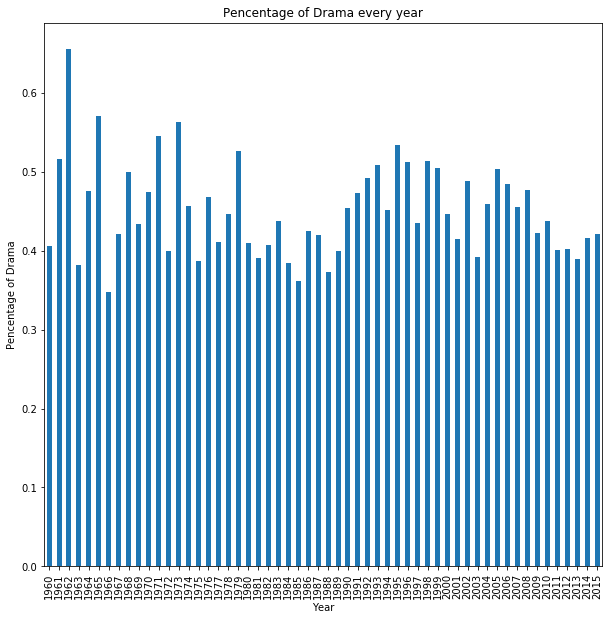

In [93]:
# set a function to show the bar chart

def barchart(genre):
    chart = df_genres[genre].plot(kind = 'bar',figsize = (10,10),title = 'Pencentage of {} every year'.format(genre))
    chart.set_xlabel('Year')
    chart.set_ylabel('Pencentage of {}'.format(genre))

# get a bar chart with Drama pencentage as Y axis, and with year as X axis.
barchart('Drama')

It shows that every year, around 40% to 50% films was classified as drama， and the pencentage has no obvious trends.

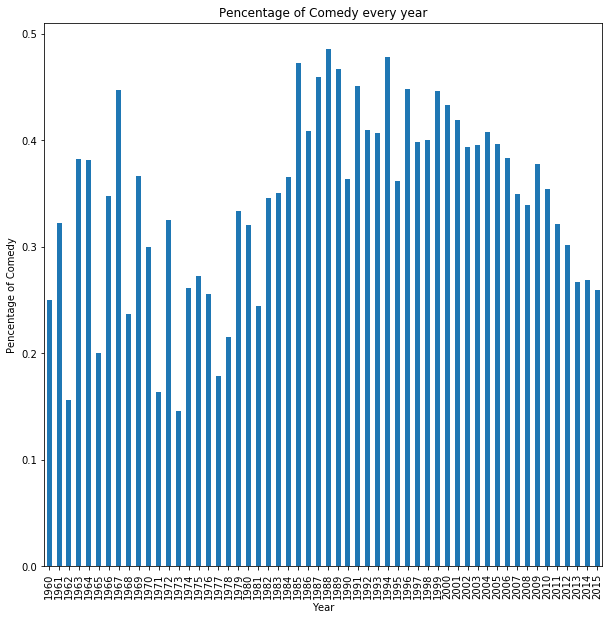

In [97]:
# get a bar chart with comedy pencentage as Y axis, and with year as X axis.
barchart('Comedy')

It shows that, after year 2000, the pencentage of comedy is decreasing every year.

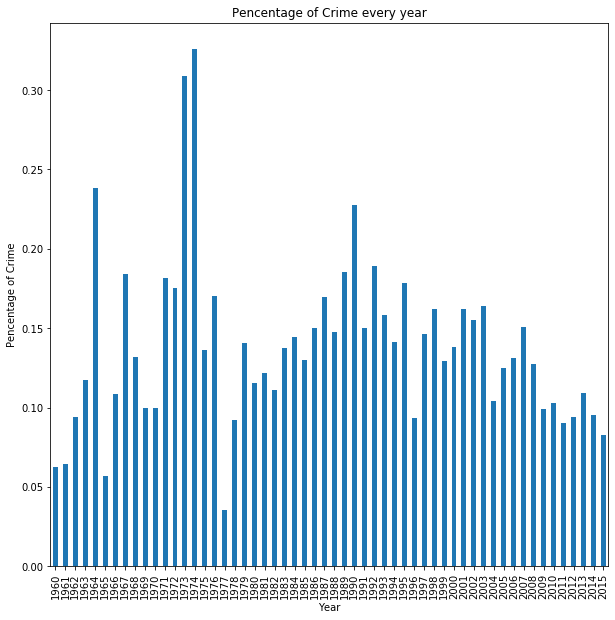

In [98]:
# get a bar chart with crime pencentage as Y axis, and with year as X axis.
barchart('Crime')

It shows that, after year 1990, the pencentage of crime is decreasing every year.

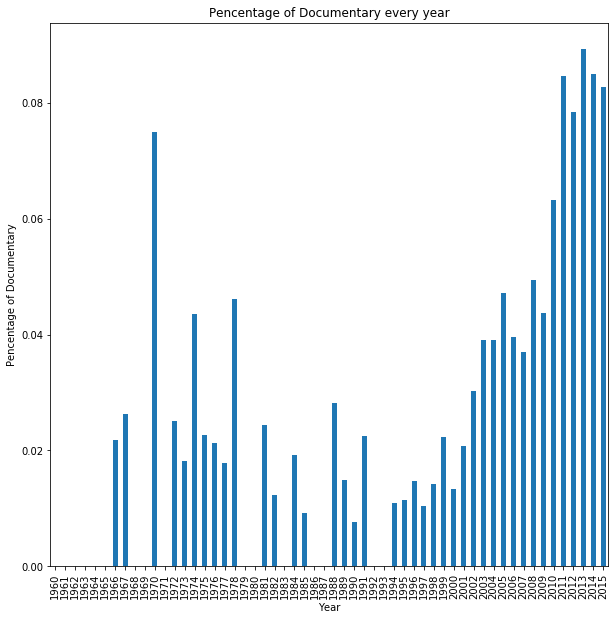

In [99]:
# get a bar chart with documentary pencentage as Y axis, and with year as X axis.
barchart('Documentary')


It shows that, after year 1994, the pencentage of documentary is increasing every year. But the pencentage is still very low compared to other category.

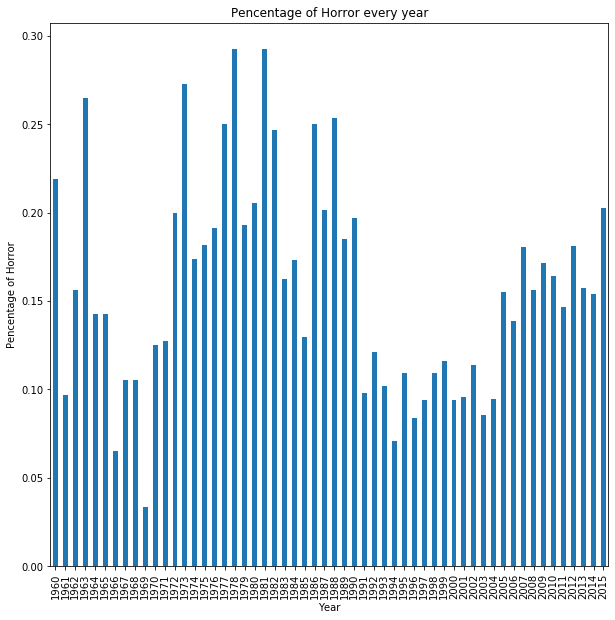

In [100]:
# get a bar chart with horror pencentage as Y axis, and with year as X axis.
barchart('Horror')

It shows that, after year 1994, the pencentage of horror is increasing every year form 7.5% to 20%.

<a id='conclusions'></a>
## 4. Conclusions
In this project, I investgated the TMDB movie data. I made use of describtive statitics technology to analysis the data set and find some correlation and rules. I understand these conclusions are incomplete.

Base on the analysis, what I have found are listed below:

### 4.1.Limitations

During the whole process, my research have following limitations:

1) The data base may not inclued all necessary films. In that situation, I will never get the correct analysis of the population.

2) There are a lot of null values, especailly for budget,revenue,budegt_adj and revenue_adj. In these columns, more than 50% of the data are missing. With so many null values, sample may not represent the population .

3) I didn't research all the variables and the relation with the other variables. It may leads to missing some important conclusions.

4) In the analyzing process, I only use the describtive statistics. for predicting, I need to use inferential statistics. I will do this step after I finish reviewing Practical Statistics Course.

### 4.2. Conclusios

Base on my analysis, the number of new films , total revenue have upward trend.

**1)About the revenue**

**The vast majority of the film's revenue are less than 25 million dollors.** It shows maybe the largest part of film industry profit was earned by the first 25% profitable films.

**Revenue has possitive corrlation with both budget and vote.** They moved in the same direction, I can tell, most of the time,there is no film both have high revenue and low vote score/low budget at the same time.

**Total revenue of all the films each year kept growing in an approximately linear manner** Maybe it shows people have more interesting in watching movies year by year.


**2)About the vote score**

**'vote_average' histogram shows a similar normal distrbution with a bit left skewed.** 

**Vote also has possitive corrlation with budget.**  I also can tell and there is no vote has high count and low score at the same time.

**Films with runing time less than 50 minutes got higher vote score than films last longer.** It shows maybe making a shorter film is a good way to get a better average vote score. **But the sample size of shorter films is limited , it may not present the population.**

**3) How genres of the films changes**

**Around 40% to 50% Films were classified as dramas.** Drama and Comedy are the only two most faverable genres all the time. And drama is the most popular.

**Audience and film studio preferences kept on changing.** During the past 20 years, films classified as comedy and crime decreased every year. At the same time, the quantity of horror films and documentary films increased every year.


# Thank you for reading my project, I really appreciate that. :)